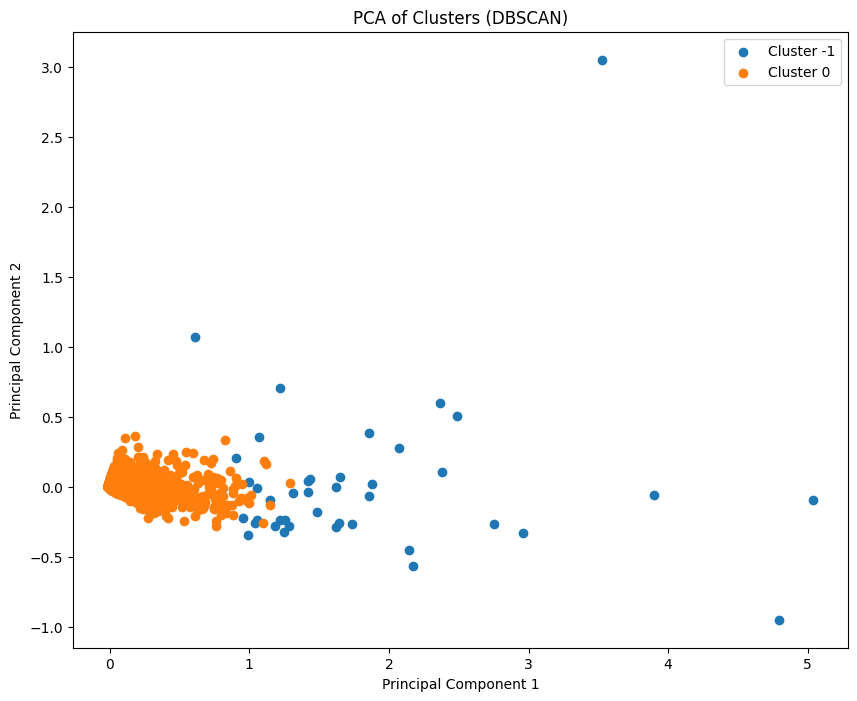

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
df_features = pd.read_csv('normalized_sector_grouped_investors.csv')
category_columns = df_features.columns[1:]
df_clean = df_features.dropna(subset=category_columns)

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean['Cluster'] = dbscan.fit_predict(df_clean[category_columns])

# Save the results
df_clean.to_csv('df_features_with_clusters_dbscan.csv', index=False)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_dims = pca.fit_transform(df_clean[category_columns])
pca_dims = pd.DataFrame(pca_dims, columns=['PC1', 'PC2'])

# Plot clusters
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for cluster in np.unique(df_clean['Cluster']):
    ix = df_clean['Cluster'] == cluster
    ax.scatter(x=pca_dims.loc[ix, 'PC1'], y=pca_dims.loc[ix, 'PC2'], label=f'Cluster {cluster}')
ax.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clusters (DBSCAN)')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate evaluation metrics
silhouette_avg = silhouette_score(df_clean[category_columns], df_clean['Cluster'])
davies_bouldin = davies_bouldin_score(df_clean[category_columns], df_clean['Cluster'])

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the data
df_features = pd.read_csv('normalized_sector_grouped_investors.csv')
category_columns = df_features.columns[1:]
df_clean = df_features.dropna(subset=category_columns)

# Adjust DBSCAN parameters
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df_clean['Cluster'] = dbscan.fit_predict(df_clean[category_columns])
        
        # Calculate evaluation metrics
        silhouette_avg = silhouette_score(df_clean[category_columns], df_clean['Cluster'])
        davies_bouldin = davies_bouldin_score(df_clean[category_columns], df_clean['Cluster'])
        
        print(f'eps: {eps}, min_samples: {min_samples}')
        print(f'Silhouette Score: {silhouette_avg}')
        print(f'Davies-Bouldin Index: {davies_bouldin}')
        print(f'Number of clusters: {len(np.unique(df_clean["Cluster"])) - (1 if -1 in df_clean["Cluster"] else 0)}\n')

eps: 0.3, min_samples: 3
Silhouette Score: 0.9698477447739877
Davies-Bouldin Index: 0.7642048959141489
Number of clusters: 2

eps: 0.3, min_samples: 5
Silhouette Score: 0.9695818108112687
Davies-Bouldin Index: 0.7675763184860274
Number of clusters: 2

eps: 0.3, min_samples: 10
Silhouette Score: 0.9692871015132278
Davies-Bouldin Index: 0.7682476623028422
Number of clusters: 2

eps: 0.5, min_samples: 3
Silhouette Score: 0.9810234185015727
Davies-Bouldin Index: 0.6847440685561594
Number of clusters: 2

eps: 0.5, min_samples: 5
Silhouette Score: 0.9806771168738802
Davies-Bouldin Index: 0.681574524378466
Number of clusters: 2

eps: 0.5, min_samples: 10
Silhouette Score: 0.9806771168738802
Davies-Bouldin Index: 0.681574524378466
Number of clusters: 2

eps: 0.7, min_samples: 3
Silhouette Score: 0.9851589623868637
Davies-Bouldin Index: 0.6471453780812975
Number of clusters: 2

eps: 0.7, min_samples: 5
Silhouette Score: 0.9849371020811141
Davies-Bouldin Index: 0.644111499875769
Number of cluste